Lab 9: Visualizing Text Data

In [1]:
import pandas as pd

# Sample dataset - replace with your own real dataset
documents = [
    "The camera quality of this phone is excellent, especially in low light.",
    "Battery life is impressive and easily lasts more than a day.",
    "I like the sleek design and build, but the battery drains quickly.",
    "The display is vibrant, but the phone heats up during gaming.",
    "Sound quality is clear and loud enough for calls and music.",
    "Battery life is disappointing, I have to charge twice a day.",
    "This phone has great performance and fast charging support.",
    "Camera features are good but software needs improvement."
]

df = pd.DataFrame({'text': documents})
print(f"Loaded {len(df)} documents.")


Loaded 8 documents.


1.  Character-Level Representation (Heatmap)

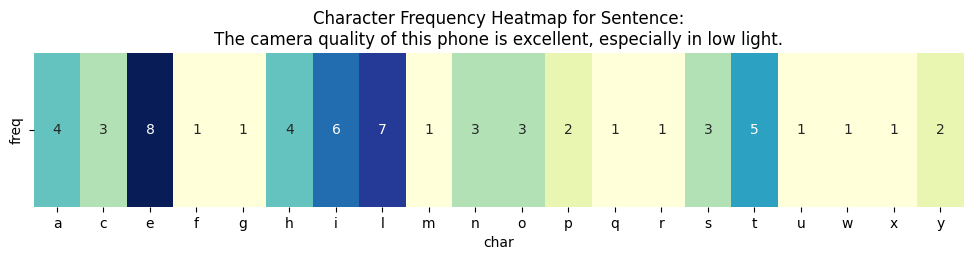

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Select a sentence to analyze character frequency
text_sample = df['text'].iloc[0].lower()

# Count characters excluding spaces
char_counts = Counter(c for c in text_sample if c.isalpha())

# Convert to dataframe for seaborn heatmap
chars = list(char_counts.keys())
freqs = list(char_counts.values())

char_df = pd.DataFrame({'char': chars, 'freq': freqs}).set_index('char').sort_index()

plt.figure(figsize=(12, 2))
sns.heatmap(char_df.T, annot=True, cmap='YlGnBu', cbar=False)
plt.title("Character Frequency Heatmap for Sentence:\n" + df['text'].iloc[0])
plt.show()


In [3]:
import sys
print(sys.executable)


e:\college\data-analysis-and-visualization-bca-2025\venv\Scripts\python.exe


2. Word-Level Representation (Bar Chart)

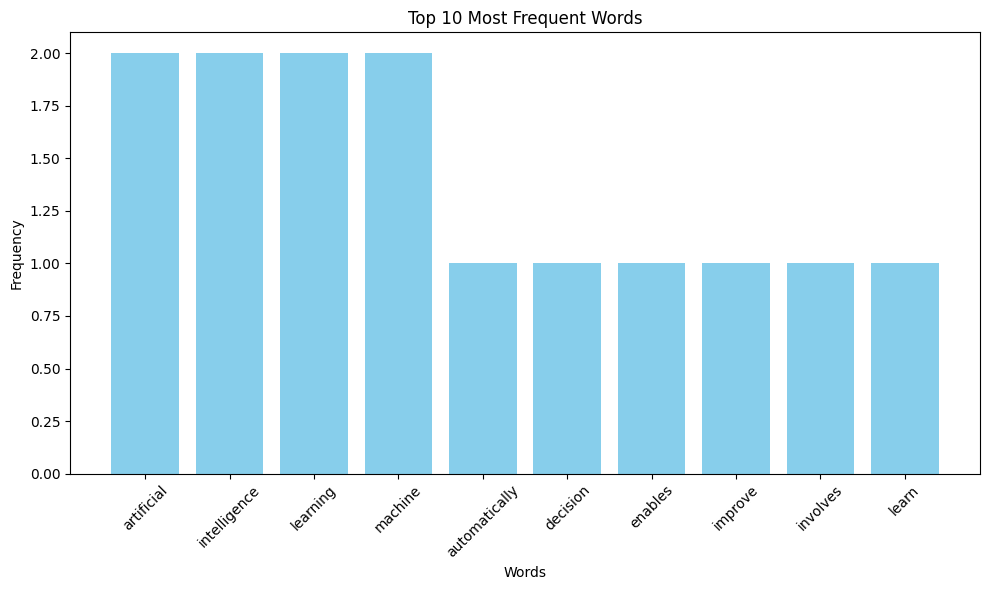

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Sample document
document = """
Artificial intelligence and machine learning are transforming the world. 
Machine learning enables systems to learn and improve automatically. 
Artificial intelligence involves reasoning, problem-solving, and decision-making.
"""

# Initialize CountVectorizer with stopwords removed
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the document
X = vectorizer.fit_transform([document])

# Get word frequencies
word_counts = X.toarray().flatten()
words = vectorizer.get_feature_names_out()

# Combine words and frequencies
word_freq = list(zip(words, word_counts))

# Sort by frequency
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]  # Top 10

# Split into x and y for plotting
top_words, top_counts = zip(*word_freq_sorted)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='skyblue')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. N-Gram Representation (Bar Chart)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14676\2256738328.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs_bar, y=bigrams_bar, palette='magma')


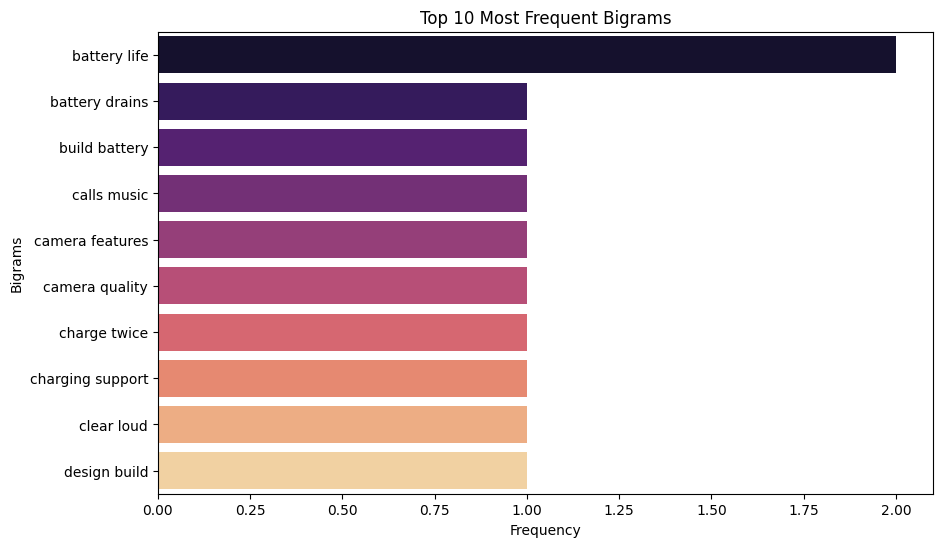

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams from the corpus
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Sum counts of each bigram
bigram_counts = X.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()
bigram_freq = sorted(zip(bigrams, bigram_counts), key=lambda x: x[1], reverse=True)[:10]

bigrams_bar = [bg for bg, _ in bigram_freq]
freqs_bar = [f for _, f in bigram_freq]

plt.figure(figsize=(10,6))
sns.barplot(x=freqs_bar, y=bigrams_bar, palette='magma')
plt.title("Top 10 Most Frequent Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()


4. TF-IDF Representation (Heatmap + Query Search)
A. Heatmap of TF-IDF



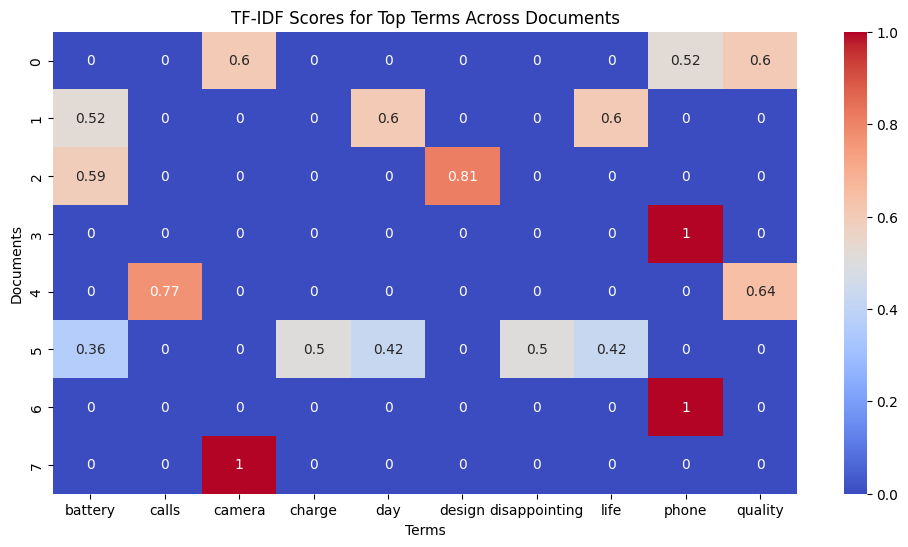

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
terms = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for heatmap
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

plt.figure(figsize=(12,6))
sns.heatmap(tfidf_df, annot=True, cmap='coolwarm')
plt.title("TF-IDF Scores for Top Terms Across Documents")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()


B. Runtime Query-Based Search Using TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Document dataset
documents = [
    "The camera quality of this phone is excellent, especially in low light.",
    "Battery life is impressive and easily lasts more than a day.",
    "I like the sleek design and build, but the battery drains quickly."
]

# Set your query directly here
query = "battery life"

# Combine documents with the query
corpus = documents + [query]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# Compute cosine similarity
cos_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Get best match
best_idx = np.argmax(cos_similarities)
best_score = cos_similarities[best_idx]

# Output result
print(f"Most relevant document: Document {best_idx + 1}")
print(f"Similarity score: {best_score:.4f}")
print("Full text:", documents[best_idx])


Most relevant document: Document 2
Similarity score: 0.4523
Full text: Battery life is impressive and easily lasts more than a day.


5.  Embeddings with spaCy

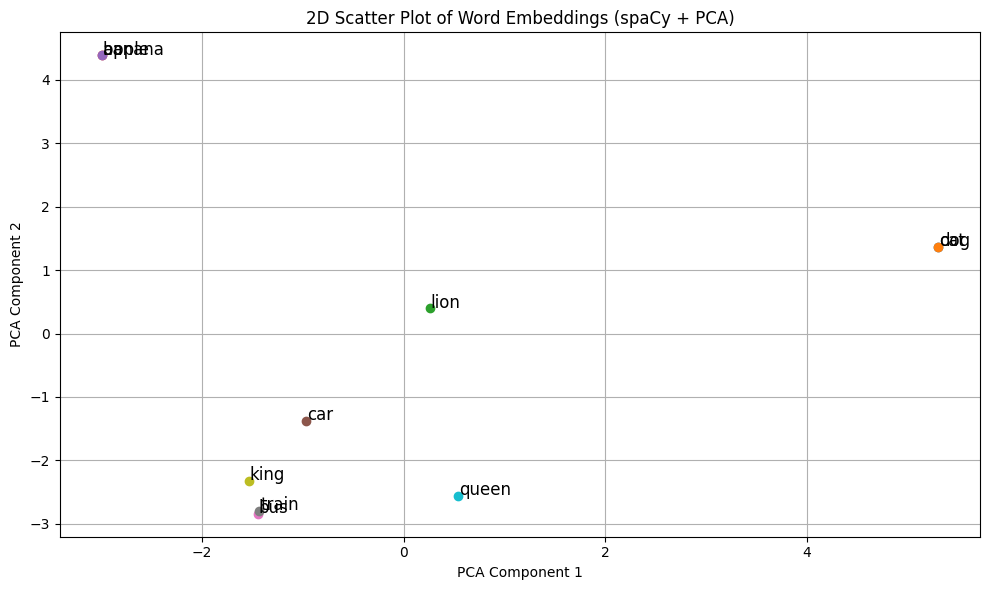

In [11]:
import spacy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load medium English model
nlp = spacy.load("en_core_web_md")

# Words to visualize
words = ["dog", "cat", "lion", "apple", "banana", "car", "bus", "train", "king", "queen"]

# Get embeddings
vectors = [nlp(word).vector for word in words]

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("2D Scatter Plot of Word Embeddings (spaCy + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


6. Word Cloud

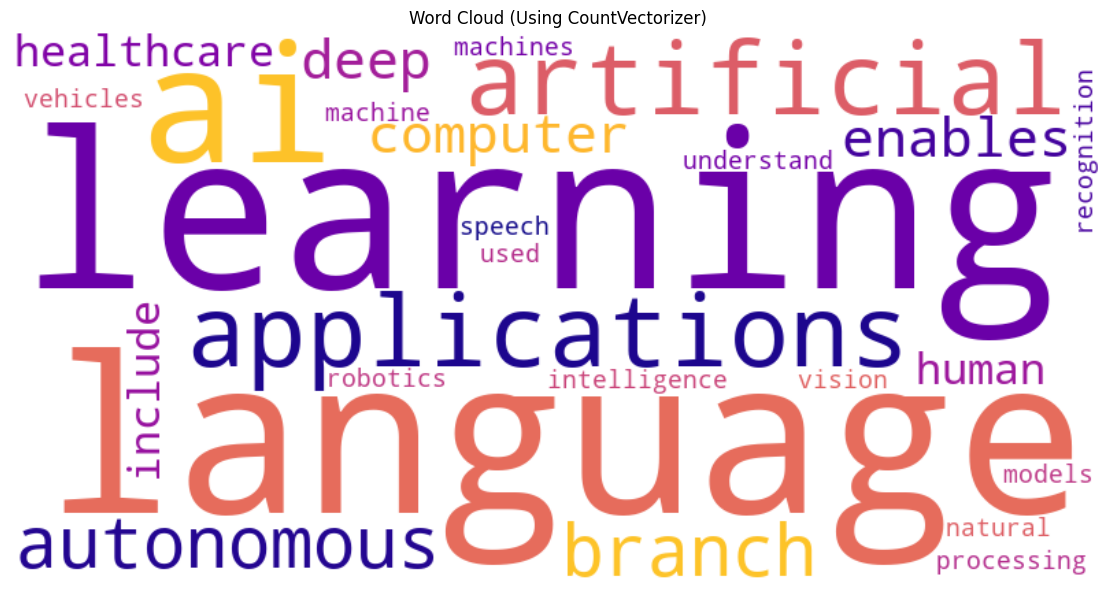

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample corpus (can be multiple documents)
documents = [
    "Machine learning is a branch of artificial intelligence.",
    "Natural language processing enables machines to understand human language.",
    "Deep learning models are used in computer vision and speech recognition.",
    "AI applications include robotics, healthcare, and autonomous vehicles."
]

# Initialize CountVectorizer with English stopwords
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Get word frequencies
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')
wordcloud.generate_from_frequencies(word_freq)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Using CountVectorizer)")
plt.tight_layout()
plt.show()
